In [41]:
import pandas as pd
import numpy as np

#Statistic
from scipy import stats

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

#Preprocessing
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

# Dataframe

In [2]:
df=pd.read_csv("C:\\Users\\Saravanan\\OneDrive\\Desktop\\Datasets_data\\job_placement.csv")

In [3]:
df

,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
0,1,John Doe,Male,25,Bachelor's,Computer Science,Harvard University,Placed,60000,3.7,2.0
1,2,Jane Smith,Female,24,Bachelor's,Electrical Engineering,Massachusetts Institute of Technology,Placed,65000,3.6,1.0
2,3,Michael Johnson,Male,26,Bachelor's,Mechanical Engineering,Stanford University,Placed,58000,3.8,3.0
3,4,Emily Davis,Female,23,Bachelor's,Information Technology,Yale University,Not Placed,0,3.5,2.0
4,5,David Brown,Male,24,Bachelor's,Computer Science,Princeton University,Placed,62000,3.9,2.0
...,...,...,...,...,...,...,...,...,...,...,...
695,696,Lucas Taylor,Male,23,Bachelor's,Computer Science,University of Washington,Placed,67000,3.8,3.0
696,697,Emma Martinez,Female,26,Bachelor's,Electronics and Communication,University of California--Berkeley,Placed,66000,3.9,3.0
697,698,Aiden Davis,Male,24,Bachelor's,Computer Science,University of Illinois--Urbana-Champaign,Placed,65000,3.8,3.0
698,699,Mia Wilson,Female,23,Bachelor's,Electrical Engineering,University of Colorado--Boulder,Placed,66000,3.7,2.0


# Observation

Unsupervised

In [4]:
df['years_of_experience'].unique()

array([ 2.,  1.,  3., nan])

In [23]:
continous_column=['salary']
catagory_column=['age', 'stream', 'college_name', 'placement_status', 'gpa', 'years_of_experience']

# Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   700 non-null    int64  
 1   name                 700 non-null    object 
 2   gender               700 non-null    object 
 3   age                  700 non-null    int64  
 4   degree               700 non-null    object 
 5   stream               700 non-null    object 
 6   college_name         700 non-null    object 
 7   placement_status     700 non-null    object 
 8   salary               700 non-null    int64  
 9   gpa                  700 non-null    float64
 10  years_of_experience  699 non-null    float64
dtypes: float64(2), int64(3), object(6)
memory usage: 60.3+ KB


In [7]:
df.set_index('id',inplace=True)

In [8]:
df.drop(['name','gender'],axis=1,inplace=True)

In [9]:
df

,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
id,,,,,,,,
1,25,Bachelor's,Computer Science,Harvard University,Placed,60000,3.7,2.0
2,24,Bachelor's,Electrical Engineering,Massachusetts Institute of Technology,Placed,65000,3.6,1.0
3,26,Bachelor's,Mechanical Engineering,Stanford University,Placed,58000,3.8,3.0
4,23,Bachelor's,Information Technology,Yale University,Not Placed,0,3.5,2.0
5,24,Bachelor's,Computer Science,Princeton University,Placed,62000,3.9,2.0
...,...,...,...,...,...,...,...,...
696,23,Bachelor's,Computer Science,University of Washington,Placed,67000,3.8,3.0
697,26,Bachelor's,Electronics and Communication,University of California--Berkeley,Placed,66000,3.9,3.0
698,24,Bachelor's,Computer Science,University of Illinois--Urbana-Champaign,Placed,65000,3.8,3.0


In [10]:
df.isnull().sum()

age                    0
degree                 0
stream                 0
college_name           0
placement_status       0
salary                 0
gpa                    0
years_of_experience    1
dtype: int64

In [11]:
df.years_of_experience.fillna(0,inplace=True)

C:\Users\Saravanan\AppData\Local\Temp\ipykernel_18056\4290773350.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.years_of_experience.fillna(0,inplace=True)


In [12]:
df.isnull().sum()

age                    0
degree                 0
stream                 0
college_name           0
placement_status       0
salary                 0
gpa                    0
years_of_experience    0
dtype: int64

In [13]:
df.duplicated().sum()

438

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 262 entries, 1 to 545
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  262 non-null    int64  
 1   degree               262 non-null    object 
 2   stream               262 non-null    object 
 3   college_name         262 non-null    object 
 4   placement_status     262 non-null    object 
 5   salary               262 non-null    int64  
 6   gpa                  262 non-null    float64
 7   years_of_experience  262 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 18.4+ KB


In [17]:
df.head()

,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
id,,,,,,,,
1,25,Bachelor's,Computer Science,Harvard University,Placed,60000,3.7,2.0
2,24,Bachelor's,Electrical Engineering,Massachusetts Institute of Technology,Placed,65000,3.6,1.0
3,26,Bachelor's,Mechanical Engineering,Stanford University,Placed,58000,3.8,3.0
4,23,Bachelor's,Information Technology,Yale University,Not Placed,0,3.5,2.0
5,24,Bachelor's,Computer Science,Princeton University,Placed,62000,3.9,2.0


# Hypothesis Testing

Continuous - Central Limit Theorem, 1-Tailed Test (one-sample t-test)

Continuous vs. Continuous - Correlation, 2-Tailed Test (two-sample t-test)

Continuous vs. Categorical - ANOVA (Analysis of Variance)

Categorical vs. Categorical - Chi-Square Test

In [18]:
def hypothesisTesting(continuous_columns = [], category_columns = [], sampling_rate = 0.20, sampling_frac=0.05):
  #Central Limit Theorem
  oneContinesColumn_result = {}
  hypothesis_df = pd.DataFrame(columns=df.columns, index=df.columns)
  if continuous_columns:
    samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
    for column in continuous_columns:
      population=df[column].values
      population_mean = population.mean()
      sample_mean=[]
      for i in range(40):
        sample=np.random.choice(population,samplesize)
        sample_mean.append(sample.mean())
      oneContinesColumn_result[column] = {
                                          "Population Mean": population_mean,
                                          "Sample Means": {np.mean(sample_mean)}
                                          }

  #1-Tailed Test
  if continuous_columns:
    samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
    for column in continuous_columns:
      H0_accepted = 0
      H0_rejected = 0
      for i in range(samplesize):
        sample=df[column].sample(frac=sampling_frac)
        t_test,p_value=stats.ttest_1samp(sample,df[column].mean())
        if p_value > 0.5:
          H0_accepted += 1
        else:
          H0_rejected += 1

      if H0_accepted > H0_rejected:
          oneContinesColumn_result[column].update( {
                                            "H0_accepted": H0_accepted,
                                            "H0_rejected": H0_rejected,
                                            "Conclusion": "H0 is accepted, Ha is rejected, There is no significant effect"
                                          } )
          hypothesis_df[column][column] = "There is a relationship"

      else:
          oneContinesColumn_result[column].update( {
                                              "H0_accepted": H0_accepted,
                                              "H0_rejected": H0_rejected,
                                              "Conclusion": "H0 is rejected, Ha is accepted, There is a significant effect"
                                              } )
          hypothesis_df[column][column] = "There is no relationship"


  #2-Tailed Test
  for i in range(len(continuous_columns) - 1):
      column_1 = continuous_columns[i]
      for column_2 in continuous_columns[i+1:]:
        H0_accepted = 0
        H0_rejected = 0
        for i in range(20):
          sample1 = df[column_1].sample(frac=sampling_frac)
          sample2 = df[column_2].sample(frac=sampling_frac)
          t_test, p_value = stats.ttest_ind(sample1, sample2)
          if p_value > 0.5:
            H0_accepted += 1
          else:
            H0_rejected += 1

        if H0_accepted > H0_rejected:
          #H0 is accepted, Ha is rejected, There is no significant effect. "H0_accepted": H0_accepted, "H0_rejected": H0_rejected
          hypothesis_df[column_1][column_2] = "There is a relationship"
          hypothesis_df[column_2][column_1] = "There is a relationship"
        else:
          #H0 is rejected, Ha is accepted, There is a significant effect. "H0_accepted": H0_accepted, "H0_rejected": H0_rejected
            hypothesis_df[column_1][column_2] = "There is no relationship"
            hypothesis_df[column_2][column_1] = "There is no relationship"

  #Chi-Square Test
  if category_columns:
    for i in range(len(category_columns) - 1):
        column_1 = category_columns[i]
        for column_2 in category_columns[i + 1:]:
            data = pd.crosstab(df[column_1], df[column_2])
            observed_values = data.values
            chi2_stat, p_value, _, _ = stats.chi2_contingency(observed_values)

            if p_value > 0.05:
                # H0 is accepted, There is no relationship between two columns we're comparing
                hypothesis_df[column_1][column_2] = "There is no relationship"
                hypothesis_df[column_2][column_1] = "There is no relationship"
            else:
                # H0 is rejected, There is a relationship between two columns we're comparing
                hypothesis_df[column_1][column_2] = "There is a relationship"
                hypothesis_df[column_2][column_1] = "There is a relationship"

  #ANOVA
  if continuous_columns and category_columns:
    for category_column in category_columns:
      for continuous_column in continuous_columns:
        group = df[category_column].unique()
        data = {}
        for i in group:
          data[i]=df[continuous_column][df[category_column]==i]

        f_value, p_value = stats.f_oneway(*[data[i] for i in group])
        if p_value > 0.05:
            # H0 is accepted, There is a relationship between two columns we're comparing
            hypothesis_df[category_column][continuous_column] = "There is a relationship"
            hypothesis_df[continuous_column][category_column] = "There is a relationship"
        else:
            # H0 is rejected, There is no relationship between two columns we're comparing
            hypothesis_df[category_column][continuous_column] = "There is no relationship"
            hypothesis_df[continuous_column][category_column] = "There is no relationship"

  return oneContinesColumn_result, hypothesis_df

In [ ]:
ContinesColumn_result, comperativeColumn_result = hypothesisTesting(continous_column , catagory_column)

In [25]:
ContinesColumn_result_df = pd.DataFrame(ContinesColumn_result)
ContinesColumn_result_df

,salary
Population Mean,54637.40458
Sample Means,{54635.57692307692}
H0_accepted,24
H0_rejected,28
Conclusion,"H0 is rejected, Ha is accepted, There is a sig..."


In [26]:

comperativeColumn_result

,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
age,NaN,NaN,There is a relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship
degree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stream,There is a relationship,NaN,NaN,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship
college_name,There is no relationship,NaN,There is no relationship,NaN,There is a relationship,There is no relationship,There is a relationship,There is a relationship
placement_status,There is no relationship,NaN,There is no relationship,There is a relationship,NaN,There is no relationship,There is a relationship,There is a relationship
salary,There is a relationship,NaN,There is a relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship
gpa,There is no relationship,NaN,There is no relationship,There is a relationship,There is a relationship,There is no relationship,NaN,There is a relationship
years_of_experience,There is no relationship,NaN,There is no relationship,There is a relationship,There is a relationship,There is no relationship,There is a relationship,NaN


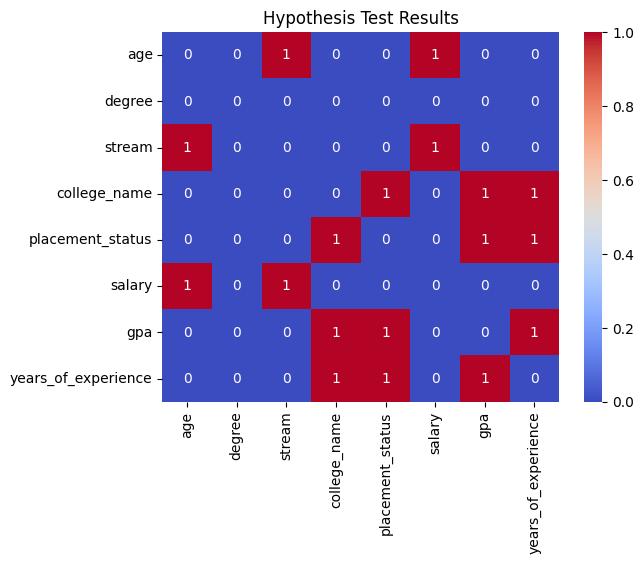

In [34]:
sns.heatmap(comperativeColumn_result == 'There is a relationship', annot=True, cmap='coolwarm')
plt.title('Hypothesis Test Results')
plt.show()

In [35]:
sns.set()
comperativeColumn_result.fillna(2, inplace = True)
comperativeColumn_result.replace({'There is a relationship': 1, 'There is no relationship': 0}, inplace=True)
fig = px.imshow(comperativeColumn_result, color_continuous_scale='Viridis',
                title="Correlation Matrix")
fig.show()

C:\Users\Saravanan\AppData\Local\Temp\ipykernel_18056\3550017903.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  comperativeColumn_result.fillna(2, inplace = True)
C:\Users\Saravanan\AppData\Local\Temp\ipykernel_18056\3550017903.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  comperativeColumn_result.replace({'There is a relationship': 1, 'There is no relationship': 0}, inplace=True)


In [ ]:
correlation_matrix = df.corr()
fig = px.imshow(correlation_matrix, color_continuous_scale='Viridis',
                title="Correlation Matrix")
fig.show()

# Pre Processing 

In [37]:
category_columns = ['gender', 'age', 'stream', 'college_name', 'placement_status', 'gpa', 'years_of_experience']

In [38]:
df['years_of_experience'].unique()

array([2., 1., 3., 0.])

In [49]:
# Replacing categorical values with numerical
encode=OrdinalEncoder()
df.stream=encode.fit_transform(df[["stream"]])
df.college_name=encode.fit_transform(df[["college_name"]])
df.placement_status=encode.fit_transform(df[["placement_status"]])

In [50]:
df.head()

,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
id,,,,,,,,
1,25,Bachelor's,0.0,5.0,1.0,60000,3.7,2.0
2,24,Bachelor's,1.0,7.0,1.0,65000,3.6,1.0
3,26,Bachelor's,4.0,11.0,1.0,58000,3.8,3.0
4,23,Bachelor's,3.0,43.0,0.0,0,3.5,2.0
5,24,Bachelor's,0.0,9.0,1.0,62000,3.9,2.0


# Machine Learning

In [51]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [55]:
x = df.drop(['placement_status','degree'], axis = 1)
y = df.placement_status

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((209, 6), (209,), (53, 6), (53,))

In [57]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier().fit(x_train,y_train)
y_pred = model.predict(x_test)

In [58]:

y_test,y_pred

(id
 15     1.0
 352    0.0
 404    0.0
 51     0.0
 234    1.0
 262    1.0
 359    1.0
 373    0.0
 449    1.0
 462    1.0
 379    1.0
 205    0.0
 315    1.0
 308    1.0
 49     1.0
 198    1.0
 242    1.0
 208    1.0
 444    1.0
 376    1.0
 334    1.0
 43     1.0
 57     1.0
 322    1.0
 20     1.0
 410    0.0
 340    1.0
 403    1.0
 450    1.0
 253    1.0
 26     0.0
 441    1.0
 5      1.0
 312    1.0
 231    1.0
 285    0.0
 316    1.0
 378    1.0
 311    1.0
 41     0.0
 428    1.0
 375    1.0
 279    1.0
 46     0.0
 445    1.0
 229    1.0
 4      0.0
 50     1.0
 298    1.0
 293    1.0
 244    1.0
 413    1.0
 42     1.0
 Name: placement_status, dtype: float64,
 array([1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
        1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
        1., 1.]))

In [59]:
accuracy = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
accuracy, cm

(1.0,
 array([[11,  0],
        [ 0, 42]], dtype=int64))

In [60]:

cm_df = pd.DataFrame(cm,columns=['predicted 0','predicted 1'])
cm_df.rename(index={0:'Actual_0', 1:'Actual_1'}, inplace=True)
cm_df
     

,predicted 0,predicted 1
Actual_0,11,0
Actual_1,0,42
